# Visualizing optimized factor results to compare runs

In [18]:
import scanpy as sc
import csv
from scipy.optimize import linear_sum_assignment

# going to start with just comparing two runs
factors_1 = []
factors_2 = []

# reading in factors from csv

with open('factors_0.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # get list of factors from csv
    factors_1 = list(csv_reader)

    csv_file.close()

with open('factors_1.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factors_2 = list(csv_reader)

    csv_file.close()

    
row_ind_1, col_ind_1 = linear_sum_assignment(factors_1)
row_ind_2, col_ind_2 = linear_sum_assignment(factors_2)


In [3]:
optimized_factors_1 = []
for r in row_ind_1:
    row = []
    for c in col_ind_1:
        row.append(float(factors_1[r][c]))
    optimized_factors_1.append(row)




In [4]:
optimized_factors_2 = []
for r in row_ind_2:
    row = []
    for c in col_ind_2:
        row.append(float(factors_2[r][c]))
    optimized_factors_2.append(row)


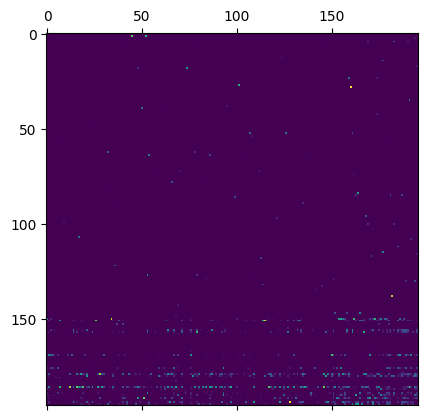

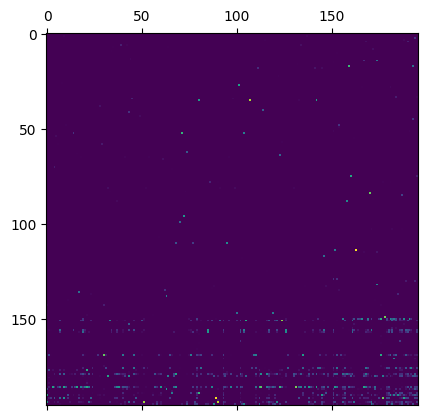

In [20]:
import matplotlib.pyplot as plt
# print(type(optimized_factors[0][0]))

plt.matshow(optimized_factors_1)

plt.matshow(optimized_factors_2)



Graph feels like it isn't super helpful - we mostly want an easy way to check
that it's returning mostly the same factors

Next thing to do:
- get the list of returned factors
- use sets to figure out how much intersection there is
- assuming high intersection means it's good
- for curiosity sake, should be easy to go with the optimized factors too, to see what happens

The factors comes from the anndata, will need to run again to get this data (can just have the clinic computer churn for a bit, should be fine.)

In [19]:
factor_names_1 = []
factor_names_2 = []
factor_names_3 = []

with open('markers_0.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # get list of factors from csv
    factor_names_1 = list(csv_reader)

    csv_file.close()

with open('markers_1.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factor_names_2 = list(csv_reader)

    csv_file.close()

with open('markers_2.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)

    factor_names_3 = list(csv_reader)

    csv_file.close()


In [17]:

intersection_score = 0

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_2[r])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print(intersection_score)

intersection_score = 0

for r in range(len(factor_names_1)):
    row1 = set(factor_names_1[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_3[r])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print(intersection_score)

intersection_score = 0

for r in range(len(factor_names_2)):
    row1 = set(factor_names_2[r])
    best = 0
    for c in range(len(factor_names_1)):
        row2 = set(factor_names_3[r])
        i = len(row1.intersection(row2))
        if i > best:
            best = i
    intersection_score += best

print(intersection_score)

print(25 * 193)

# Still want to compare with a Different dataset, will need to check in with that later

2626
2513
2485
4825


In [27]:
intersection_score = 0

factor_names_set_1 = []
for r in range(len(factor_names_1)):
    for c in range(5):
        factor_names_set_1.append(factor_names_1[r][c])

factor_names_set_2 = []
for r in range(len(factor_names_1)):
    for c in range(5):
        factor_names_set_2.append(factor_names_2[r][c])


factor_names_set_3 = []
for r in range(len(factor_names_1)):
    for c in range(5):
        factor_names_set_3.append(factor_names_3[r][c])



factor_names_set_1 = set(factor_names_set_1)

factor_names_set_2 = set(factor_names_set_2)

factor_names_set_3 = set(factor_names_set_3)

print(len(factor_names_set_1.intersection(factor_names_set_2)))
print(len(factor_names_set_1.intersection(factor_names_set_3)))
print(len(factor_names_set_3.intersection(factor_names_set_2)))

559
558
560


In [28]:
import numpy as np

idx_matrix = np.argsort(factors_1,axis = 1)[:,::-1][:,:15]

print(idx_matrix.shape)


print(5 * 193)


(196, 15)
965


So ~half has the same factors. The markers are getting pulled from the factors, and are the nth highest factor weights.

But even as you limit n smaller and smaller, still about half of the factors match for each dataset are the same.

At this point, I need to ask Roshan about it, and look at the new data (so check in on how that's going)